In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df = pd.read_csv('neelabh_data_with_clusters.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['date'] = df['datetime'].dt.day

In [3]:
df.head()

,datetime,LATITUDE,LONGITUDE,clusterID,hour,weekday,month,date
0,2017-04-27 18:01:54,32.733402,-97.113254,8,18,3,4,27
1,2017-04-27 17:58:30,32.733626,-97.109255,8,17,3,4,27
2,2017-04-27 09:54:03,32.733423,-97.103172,1,9,3,4,27
3,2017-04-27 09:49:10,32.733399,-97.103327,1,9,3,4,27
4,2017-04-26 22:55:31,32.733014,-97.103329,1,22,2,4,26


In [4]:
weather_df = pd.read_excel('Arlington_Weather.xlsx')
weather_df['day'] = weather_df['DATE'].dt.dayofweek
weather_df['month'] = weather_df['DATE'].dt.month
weather_df['date'] = weather_df['DATE'].dt.day

In [5]:
weather_df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,TOBS,day,month,date
0,2017-01-01,0.00,58.0,72,44,44,6,1,1
1,2017-01-02,0.45,53.0,62,44,54,0,1,2
2,2017-01-03,0.00,60.0,71,49,50,1,1,3
3,2017-01-04,0.00,42.5,53,32,32,2,1,4
4,2017-01-05,0.00,34.0,37,31,37,3,1,5


In [6]:
prcp = []
tavg = []
for i in range(len(df)):
    prcp.append(weather_df[((weather_df['month']==df.loc[i]['month']) & (weather_df['date']==df.loc[i]['date']))]['PRCP'].values[0])
    tavg.append(weather_df[((weather_df['month']==df.loc[i]['month']) & (weather_df['date']==df.loc[i]['date']))]['TAVG'].values[0])
PRCP = pd.DataFrame(np.array(prcp), columns=['PRCP'])
TAVG = pd.DataFrame(np.array(tavg), columns=['TAVG'])
df = pd.concat([df, PRCP, TAVG], axis=1)

In [7]:
df['clusterID'].unique()

array([ 8,  1,  4,  7,  3,  9, 10,  5,  2,  6])

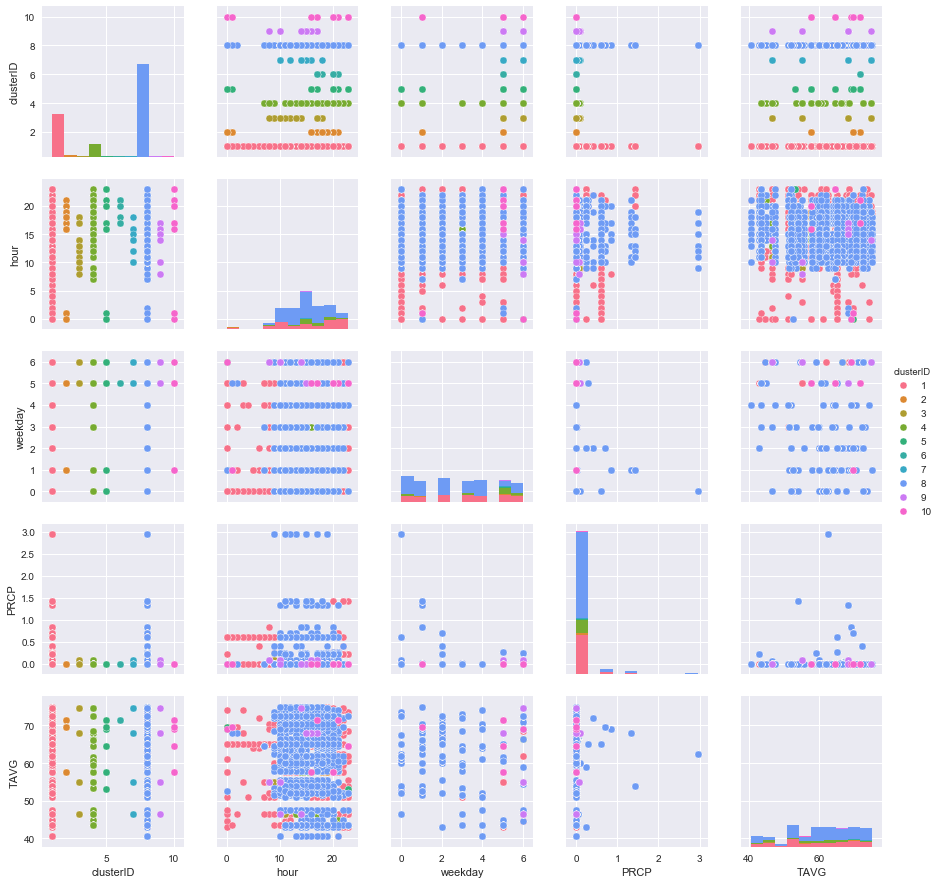

In [9]:
sns.pairplot(df[['clusterID', 'hour', 'weekday', 'PRCP', 'TAVG']], hue='clusterID')

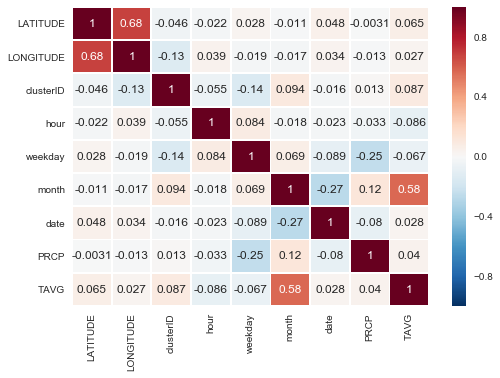

In [10]:
sns.heatmap(df.corr(), annot = True, linewidth=.9)

In [11]:
df.head()

,datetime,LATITUDE,LONGITUDE,clusterID,hour,weekday,month,date,PRCP,TAVG
0,2017-04-27 18:01:54,32.733402,-97.113254,8,18,3,4,27,0.03,59.5
1,2017-04-27 17:58:30,32.733626,-97.109255,8,17,3,4,27,0.03,59.5
2,2017-04-27 09:54:03,32.733423,-97.103172,1,9,3,4,27,0.03,59.5
3,2017-04-27 09:49:10,32.733399,-97.103327,1,9,3,4,27,0.03,59.5
4,2017-04-26 22:55:31,32.733014,-97.103329,1,22,2,4,26,0.40,72.0


In [12]:
# hour = to_categorical(df['hour'].as_matrix())
# weekday = to_categorical(df['weekday'].as_matrix())
month = to_categorical(df['month'].as_matrix())
date = to_categorical(df['date'].as_matrix())
# latitude = (df['LATITUDE']/df['LATITUDE'].max()).as_matrix().reshape(-1,1)
# longitude = (df['LONGITUDE']/df['LONGITUDE'].max()).as_matrix().reshape(-1,1)
latitude = df['LATITUDE'].as_matrix().reshape(-1,1)
longitude = df['LONGITUDE'].as_matrix().reshape(-1,1)
prcp = df['PRCP'].as_matrix().reshape(-1,1)
tavg = (df['TAVG']/df['TAVG'].max()).as_matrix().reshape(-1,1)
hour = (df['hour']/df['hour'].max()).as_matrix().reshape(-1,1)
weekday = (df['weekday']/df['weekday'].max()).as_matrix().reshape(-1,1)

In [13]:
X = np.concatenate((latitude, longitude, hour, weekday, prcp, tavg), axis=1)
y = df['clusterID'].as_matrix()
y_cat = to_categorical(y)
y_cat = np.delete(y_cat, 1, 1)

In [14]:
X[0,:]

array([  3.27334024e+01,  -9.71132539e+01,   7.82608696e-01,
         5.00000000e-01,   3.00000000e-02,   7.93333333e-01])

In [15]:
X.shape

(4466, 6)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In [17]:
y_train.shape

(3126, 10)

In [39]:
df[df['clusterID']==8].shape[0]

2688

In [38]:
df.shape[0]

4466

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras import backend as K

In [20]:
K.clear_session()
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1], ), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.compile(Adam(lr=0.03), loss=
             'categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=16)

Train on 2500 samples, validate on 626 samples
Epoch 1/20
2500/2500 [==============================] - 0s - loss: 0.5066 - acc: 0.5960 - val_loss: 0.5116 - val_acc: 0.6246
Epoch 2/20
2500/2500 [==============================] - 0s - loss: 0.4767 - acc: 0.6004 - val_loss: 0.5230 - val_acc: 0.6246

In [22]:
results = model.evaluate(X_test, y_test)

  32/1340 [..............................] - ETA: 0s

In [23]:
print(results)

[0.52551373403463786, 0.59402985047938217]


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result = model.predict(X_test)
y_test_true = np.argmax(y_test, axis=1)
y_pred_true = np.argmax(result, axis=1)
confusion_matrix(y_test_true, y_pred_true)

array([[  0,   0,   0,   0,   0,   0,   0, 383,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  13,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  13,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 103,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 796,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,   0,   0]])

# Note:
Jees, if you notice in cell number 36, I have pointed out that the cluster 8 is the one which has the highest number of data points. ClusterID 8 has 2688 out of 4466 points. So if one needs to guess a random classification blindly, he would be 2688/4466*100 % correct, i.e. 60% right. So we are doing as good as any person making a guess blindly. 
This is solely because of dominance of clusterID 8. 